In [2]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [2]:
df = pd.read_excel('/Users/cochral/Dropbox (The Francis Crick)/staging/holes_pupae_counting_staging.xlsx', '19.02 lucy-analysis')

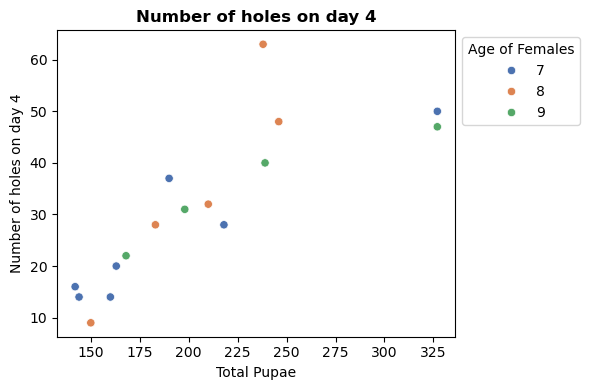

In [55]:
plt.figure(figsize=(6, 4))

sns.scatterplot(data=df, x='Total Pupa', y='Day4 NO.holes: 576 - 720', hue='Age of Females', palette='deep')

plt.title('Number of holes on day 4', fontweight='bold')
plt.xlabel('Total Pupae')
plt.ylabel('Number of holes on day 4')
plt.legend(title='Age of Females')

plt.legend(title='Age of Females', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/analysis/4h_staging_figures/pupa_v_holes.png', dpi=300, format='png')
plt.show()





In [32]:

model = sm.OLS.from_formula('Q("Day4 NO.holes: 576 - 720") ~ Q("Total Pupa")', data=df).fit()


print(model.params)

Intercept         -13.868023
Q("Total Pupa")     0.218253
dtype: float64


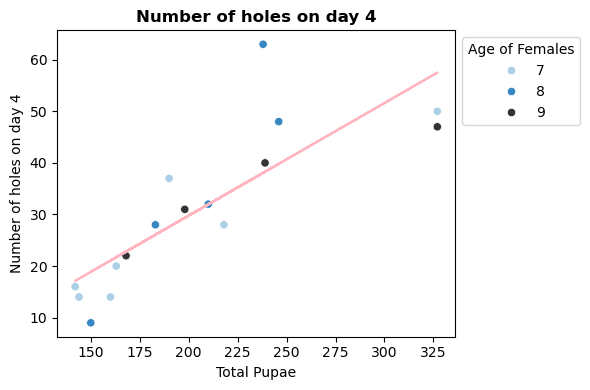

In [54]:
df['predicted'] = model.predict(df)

plt.figure(figsize=(6, 4))

sns.scatterplot(data=df, x='Total Pupa', y='Day4 NO.holes: 576 - 720', hue='Age of Females', palette='Blues_d')

plt.title('Number of holes on day 4', fontweight='bold')
plt.xlabel('Total Pupae')
plt.ylabel('Number of holes on day 4')
plt.legend(title='Age of Females')

plt.legend(title='Age of Females', loc='upper left', bbox_to_anchor=(1, 1))


plt.plot(df['Total Pupa'], df['predicted'], color='lightpink', label='Line of best fit')

plt.tight_layout()
plt.savefig('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/analysis/4h_staging_figures/pupa_v_holes_bestline.png', dpi=300, format='png')

plt.show()

In [3]:
df2 = pd.read_excel('/Users/cochral/Dropbox (The Francis Crick)/staging/holes_pupae_counting_staging.xlsx', '19.02  4h')

/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_94765/2246785728.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df2, x='Age of Females', y='Total Pupa', hue='Ratio', edgecolor='black', ci='sd', palette='Blues_d')


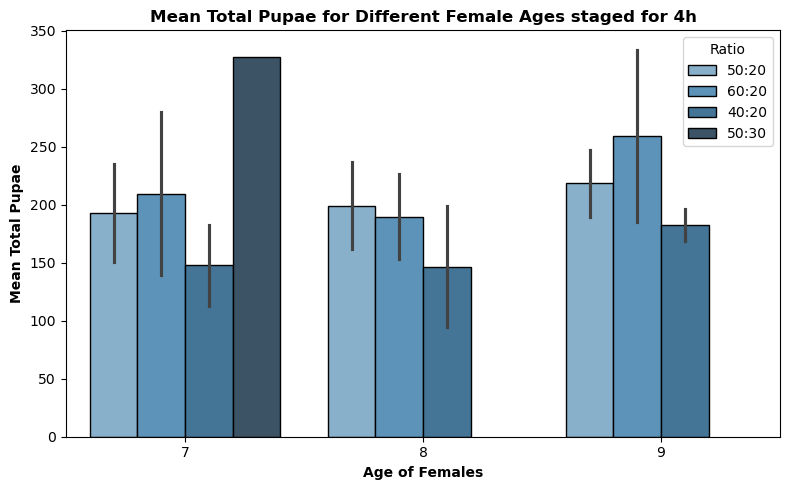

In [78]:
# x=age y=pupa ratio is the hue 
# ignore empty columns 

df2['number of females'] = df2['number of females'].astype(int)
df2['number of males'] = df2['number of males'].astype(int)

df2['Ratio'] = df2['number of females'].astype(str) + ':' + df2['number of males'].astype(str)

plt.figure(figsize=(8, 5))

sns.barplot(data=df2, x='Age of Females', y='Total Pupa', hue='Ratio', edgecolor='black', ci='sd', palette='Blues_d')

plt.title('Mean Total Pupae for Different Female Ages staged for 4h', fontweight='bold')
plt.xlabel('Age of Females', fontweight='bold')
plt.ylabel('Mean Total Pupae', fontweight='bold')

plt.tight_layout()
plt.savefig('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/analysis/4h_staging_figures/pupa_4h_ratio.png', dpi=300, format='png')
 
plt.show()

/Users/cochral/miniconda3/envs/maggots/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/g_/qk19_b9s62l1w5lmx5_1gmzjx_y855/T/ipykernel_21372/4285637171.py:31: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


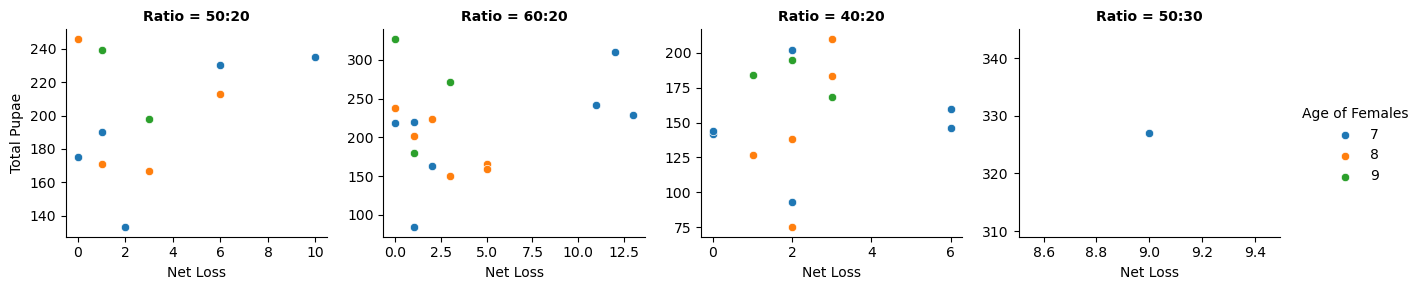

In [7]:

df2['Ratio'] = df2['number of females'].astype(str) + ':' + df2['number of males'].astype(str)


df2['Net Loss'] = df2['Net Loss'].astype(int)


df2['staging time'] = df2['staging time'].astype('category')
df2['Age of Females'] = df2['Age of Females'].astype('category')


# Create a FacetGrid for subplots based on 'staging time' and 'ratios' conditions
# 'col' and 'row' parameters could be adjusted based on your specific conditions.
g = sns.FacetGrid(df2, col='Ratio', hue='Age of Females', col_wrap=5, sharex=False, sharey=False)

# Map a scatter plot to the FacetGrid
g.map(sns.scatterplot, 'Net Loss', 'Total Pupa')

# Add a legend

g.add_legend(title='Age of Females', bbox_to_anchor=(0.8, 0.5), loc='center left')



# Set the axis labels
g.set_axis_labels('Net Loss', 'Total Pupae')

# Adjust the subplot titles if necessary
g.set_titles(col_template="{col_name}")
g.set_titles(row_template='{row_name}', fontweight='bold')

plt.tight_layout()

plt.savefig('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/analysis/4h_staging_figures/net_loss_pupa_4h.png', dpi=300, format='png')
# Show the plot
plt.show()